In [2]:
import sys
sys.path.append("contrastive-regression/models/")
#from linear_sscr import LinearSSCR
from linear_cr_bz import LinearCRBZ
import scanpy as sc
import pandas as pd

In [9]:
import matplotlib.pyplot as plt
import matplotlib
font = {"size": 20}
matplotlib.rc("font", **font)
matplotlib.rcParams["text.usetex"] = True


In [ ]:
from sklearn.metrics import r2_score
from scipy.stats import linregress

In [3]:
no_polyp_order = pd.read_csv("data/polyps/no_polyp_epithelial_pseudotime_order.csv",header=None, index_col=0)
polyp_order = pd.read_csv("data/polyps/polyp_epithelial_pseudotime_order.csv",header=None, index_col=0)

In [4]:
adata=sc.read_h5ad("data/polyps/processed_adata.h5ad")

In [5]:
sc.pp.scale(adata, max_value=10)
background_scaled = adata[polyp_order.index].X
foreground_scaled = adata[no_polyp_order.index].X

In [6]:
model_scaled = LinearCRBZ()

In [7]:
# split foreground into train and test
from sklearn.model_selection import train_test_split

foreground_train, foreground_test, no_polyp_order_train, no_polyp_order_test = train_test_split(foreground_scaled,no_polyp_order.to_numpy(), test_size=0.4, random_state=0)

In [ ]:
import os
n_dims = 10
r2_train = []
r2_test = []
for n_dims in [2,4,6,8,10,12,14,16]:
    model = LinearCRBZ()
    model.fit(foreground_train, background_scaled, no_polyp_order_train,d=n_dims,print_every=100)
    preds = model.predict(foreground_train)
    _, _, r2_contrastivereg, _, _ = linregress(no_polyp_order_train.squeeze(), preds)
    r2_train.append(r2_contrastivereg)
    preds = model.predict(foreground_test)
    _, _, r2_contrastivereg, _, _ = linregress(no_polyp_order_test.squeeze(), preds)
    r2_test.append(r2_contrastivereg)
    dirname = "CVdim"+str(n_dims)+"/"
    os.mkdir(dirname)
    dims = ["Dim%d" % i for i in range(0,n_dims)]
    loading_w = pd.DataFrame(model.W, columns = adata.var_names, index = dims,dtype = "float")
    loading_w.to_csv(dirname+"W.csv")
    latent_t = pd.DataFrame(model.t, columns = dims, dtype="float")
    latent_t.to_csv(dirname+"t.csv")
    auxiliary_s = pd.DataFrame(model.S, columns = adata.var_names, index = dims, dtype="float")
    auxiliary_s.to_csv(dirname+"S.csv")
    betas = pd.DataFrame(data=model.beta)
    betas.to_csv(dirname+"beta.csv")

Step: 0               Log marginal lik.: -5138943488.0
Step: 100             Log marginal lik.: -1234635392.0
Step: 200             Log marginal lik.: -723762752.0
Step: 300             Log marginal lik.: -526365632.0
Step: 400             Log marginal lik.: -418534464.0
Step: 500             Log marginal lik.: -349557344.0
Step: 600             Log marginal lik.: -301177312.0
Step: 700             Log marginal lik.: -265122992.0
Step: 800             Log marginal lik.: -237073088.0
Step: 900             Log marginal lik.: -214536192.0
Step: 1000            Log marginal lik.: -195971872.0
Step: 1100            Log marginal lik.: -180372368.0
Step: 1200            Log marginal lik.: -167047552.0
Step: 1300            Log marginal lik.: -155509072.0
Step: 1400            Log marginal lik.: -145399120.0
Step: 1500            Log marginal lik.: -136454288.0
Step: 1600            Log marginal lik.: -128466856.0
Step: 1700            Log marginal lik.: -121283968.0
Step: 1800            Log 

Step: 15700           Log marginal lik.: -285140.0
Step: 15800           Log marginal lik.: -284488.94
Step: 15900           Log marginal lik.: -283872.19
Step: 16000           Log marginal lik.: -283288.62
Step: 16100           Log marginal lik.: -282736.06
Step: 16200           Log marginal lik.: -282213.12
Step: 16300           Log marginal lik.: -281718.34
Step: 16400           Log marginal lik.: -281250.28
Step: 16500           Log marginal lik.: -280807.66
Step: 16600           Log marginal lik.: -280389.31
Step: 16700           Log marginal lik.: -279993.78
Step: 16800           Log marginal lik.: -279620.16
Step: 16900           Log marginal lik.: -279267.22
Step: 17000           Log marginal lik.: -278933.91
Step: 17100           Log marginal lik.: -278619.47
Step: 17200           Log marginal lik.: -278322.59
Step: 17300           Log marginal lik.: -278042.91
Step: 17400           Log marginal lik.: -277778.94
Step: 17500           Log marginal lik.: -277530.19
Step: 17600  

Step: 10700           Log marginal lik.: -6732248.0
Step: 10800           Log marginal lik.: -6572974.0
Step: 10900           Log marginal lik.: -6417332.5
Step: 11000           Log marginal lik.: -6265967.5
Step: 11100           Log marginal lik.: -6117668.5
Step: 11200           Log marginal lik.: -5973760.5
Step: 11300           Log marginal lik.: -5832714.0
Step: 11400           Log marginal lik.: -5695494.5
Step: 11500           Log marginal lik.: -5561752.0
Step: 11600           Log marginal lik.: -5430993.0
Step: 11700           Log marginal lik.: -5303162.5
Step: 11800           Log marginal lik.: -5178783.5
Step: 11900           Log marginal lik.: -5056671.0
Step: 12000           Log marginal lik.: -4937276.5
Step: 12100           Log marginal lik.: -4821153.0
Step: 12200           Log marginal lik.: -4706875.0
Step: 12300           Log marginal lik.: -4595091.0
Step: 12400           Log marginal lik.: -4485447.0
Step: 12500           Log marginal lik.: -4377283.5
Step: 12600 

Step: 5900            Log marginal lik.: -17982426.0
Step: 6000            Log marginal lik.: -17504548.0
Step: 6100            Log marginal lik.: -17040940.0
Step: 6200            Log marginal lik.: -16592345.0
Step: 6300            Log marginal lik.: -16157369.0
Step: 6400            Log marginal lik.: -15734503.0
Step: 6500            Log marginal lik.: -15326853.0
Step: 6600            Log marginal lik.: -14928106.0
Step: 6700            Log marginal lik.: -14543170.0
Step: 6800            Log marginal lik.: -14169922.0
Step: 6900            Log marginal lik.: -13806442.0
Step: 7000            Log marginal lik.: -13453213.0
Step: 7100            Log marginal lik.: -13110258.0
Step: 7200            Log marginal lik.: -12777955.0
Step: 7300            Log marginal lik.: -12454139.0
Step: 7400            Log marginal lik.: -12140222.0
Step: 7500            Log marginal lik.: -11834774.0
Step: 7600            Log marginal lik.: -11537517.0
Step: 7700            Log marginal lik.: -1124

Step: 100             Log marginal lik.: -720122368.0
Step: 200             Log marginal lik.: -421885920.0
Step: 300             Log marginal lik.: -307599040.0
Step: 400             Log marginal lik.: -245112448.0
Step: 500             Log marginal lik.: -205090112.0
Step: 600             Log marginal lik.: -176989712.0
Step: 700             Log marginal lik.: -156031360.0
Step: 800             Log marginal lik.: -139715024.0
Step: 900             Log marginal lik.: -126599080.0
Step: 1000            Log marginal lik.: -115790520.0
Step: 1100            Log marginal lik.: -106705952.0
Step: 1200            Log marginal lik.: -98946872.0
Step: 1300            Log marginal lik.: -92230856.0
Step: 1400            Log marginal lik.: -86351016.0
Step: 1500            Log marginal lik.: -81152664.0
Step: 1600            Log marginal lik.: -76518232.0
Step: 1700            Log marginal lik.: -72356656.0
Step: 1800            Log marginal lik.: -68596224.0
Step: 1900            Log marginal 

Step: 15700           Log marginal lik.: -1630040.75
Step: 15800           Log marginal lik.: -1596493.0
Step: 15900           Log marginal lik.: -1563461.5
Step: 16000           Log marginal lik.: -1531376.75
Step: 16100           Log marginal lik.: -1500040.0
Step: 16200           Log marginal lik.: -1469633.5
Step: 16300           Log marginal lik.: -1439888.5
Step: 16400           Log marginal lik.: -1410882.12
Step: 16500           Log marginal lik.: -1382418.25
Step: 16600           Log marginal lik.: -1354902.0
Step: 16700           Log marginal lik.: -1328019.12
Step: 16800           Log marginal lik.: -1301601.38
Step: 16900           Log marginal lik.: -1275955.25
Step: 17000           Log marginal lik.: -1251032.12
Step: 17100           Log marginal lik.: -1226646.0
Step: 17200           Log marginal lik.: -1202738.0
Step: 17300           Log marginal lik.: -1179496.5
Step: 17400           Log marginal lik.: -1156824.75
Step: 17500           Log marginal lik.: -1134725.62
St

In [36]:
for n_dims in [20,30,40,50]:
    model = LinearCRBZ()
    model.fit(foreground_train, background_scaled, no_polyp_order_train,d=n_dims,print_every=100)
    preds = model.predict(foreground_train)
    _, _, r2_contrastivereg, _, _ = linregress(no_polyp_order_train.squeeze(), preds)
    r2_train.append(r2_contrastivereg)
    preds = model.predict(foreground_test)
    _, _, r2_contrastivereg, _, _ = linregress(no_polyp_order_test.squeeze(), preds)
    r2_test.append(r2_contrastivereg)
    dirname = "CVdim"+str(n_dims)+"/"
    os.mkdir(dirname)
    dims = ["Dim%d" % i for i in range(0,n_dims)]
    loading_w = pd.DataFrame(model.W, columns = adata.var_names, index = dims,dtype = "float")
    loading_w.to_csv(dirname+"W.csv")
    latent_t = pd.DataFrame(model.t, columns = dims, dtype="float")
    latent_t.to_csv(dirname+"t.csv")
    auxiliary_s = pd.DataFrame(model.S, columns = adata.var_names, index = dims, dtype="float")
    auxiliary_s.to_csv(dirname+"S.csv")
    betas = pd.DataFrame(data=model.beta)
    betas.to_csv(dirname+"beta.csv")

Step: 0               Log marginal lik.: -5365832704.0
Step: 100             Log marginal lik.: -473846944.0
Step: 200             Log marginal lik.: -281905408.0
Step: 300             Log marginal lik.: -206459232.0
Step: 400             Log marginal lik.: -164862640.0
Step: 500             Log marginal lik.: -138108496.0
Step: 600             Log marginal lik.: -119275384.0
Step: 700             Log marginal lik.: -105203440.0
Step: 800             Log marginal lik.: -94233024.0
Step: 900             Log marginal lik.: -85404336.0
Step: 1000            Log marginal lik.: -78121496.0
Step: 1100            Log marginal lik.: -71993936.0
Step: 1200            Log marginal lik.: -66754340.0
Step: 1300            Log marginal lik.: -62213056.0
Step: 1400            Log marginal lik.: -58232068.0
Step: 1500            Log marginal lik.: -54708768.0
Step: 1600            Log marginal lik.: -51565428.0
Step: 1700            Log marginal lik.: -48741652.0
Step: 1800            Log marginal li

Step: 15600           Log marginal lik.: -1078741.38
Step: 15700           Log marginal lik.: -1055813.5
Step: 15800           Log marginal lik.: -1033435.69
Step: 15900           Log marginal lik.: -1011552.12
Step: 16000           Log marginal lik.: -990189.44
Step: 16100           Log marginal lik.: -969501.81
Step: 16200           Log marginal lik.: -948960.25
Step: 16300           Log marginal lik.: -929285.38
Step: 16400           Log marginal lik.: -909906.0
Step: 16500           Log marginal lik.: -891180.94
Step: 16600           Log marginal lik.: -872952.44
Step: 16700           Log marginal lik.: -854903.44
Step: 16800           Log marginal lik.: -837470.12
Step: 16900           Log marginal lik.: -820329.56
Step: 17000           Log marginal lik.: -803685.38
Step: 17100           Log marginal lik.: -787623.88
Step: 17200           Log marginal lik.: -771658.06
Step: 17300           Log marginal lik.: -756323.44
Step: 17400           Log marginal lik.: -740953.81
Step: 1750

Step: 31400           Log marginal lik.: -136881.89
Step: 31500           Log marginal lik.: -136260.16
Step: 31600           Log marginal lik.: -135655.27
Step: 31700           Log marginal lik.: -135050.34
Step: 31800           Log marginal lik.: -134458.47
Step: 31900           Log marginal lik.: -133883.66
Step: 32000           Log marginal lik.: -133309.69
Step: 32100           Log marginal lik.: -132755.62
Step: 32200           Log marginal lik.: -132220.42
Step: 32300           Log marginal lik.: -131680.95
Step: 32400           Log marginal lik.: -131159.95
Step: 32500           Log marginal lik.: -130644.94
Step: 32600           Log marginal lik.: -130138.34
Step: 32700           Log marginal lik.: -129657.45
Step: 32800           Log marginal lik.: -129163.14
Step: 32900           Log marginal lik.: -128669.12
Step: 33000           Log marginal lik.: -127380.97
Step: 33100           Log marginal lik.: -102796.74
Step: 33200           Log marginal lik.: -101441.47
Step: 0     

Step: 13700           Log marginal lik.: -1291749.75
Step: 13800           Log marginal lik.: -1261726.0
Step: 13900           Log marginal lik.: -1233184.12
Step: 14000           Log marginal lik.: -1204965.62
Step: 14100           Log marginal lik.: -1177722.75
Step: 14200           Log marginal lik.: -1151111.62
Step: 14300           Log marginal lik.: -1125072.0
Step: 14400           Log marginal lik.: -1099757.0
Step: 14500           Log marginal lik.: -1074847.88
Step: 14600           Log marginal lik.: -1050767.88
Step: 14700           Log marginal lik.: -1027253.81
Step: 14800           Log marginal lik.: -1004359.31
Step: 14900           Log marginal lik.: -981871.69
Step: 15000           Log marginal lik.: -959957.19
Step: 15100           Log marginal lik.: -938800.69
Step: 15200           Log marginal lik.: -917972.31
Step: 15300           Log marginal lik.: -897454.19
Step: 15400           Log marginal lik.: -877871.81
Step: 15500           Log marginal lik.: -858460.31
Ste

Step: 29500           Log marginal lik.: -87911.39
Step: 29600           Log marginal lik.: -87120.16
Step: 29700           Log marginal lik.: -86338.19
Step: 29800           Log marginal lik.: -85575.91
Step: 29900           Log marginal lik.: -84799.02
Step: 30000           Log marginal lik.: -84059.28
Step: 30100           Log marginal lik.: -83342.62
Step: 30200           Log marginal lik.: -82650.16
Step: 30300           Log marginal lik.: -81937.44
Step: 30400           Log marginal lik.: -81258.65
Step: 30500           Log marginal lik.: -80578.12
Step: 30600           Log marginal lik.: -79938.02
Step: 30700           Log marginal lik.: -79304.83
Step: 30800           Log marginal lik.: -78651.3
Step: 30900           Log marginal lik.: -78035.98
Step: 31000           Log marginal lik.: -77429.45
Step: 31100           Log marginal lik.: -76834.9
Step: 31200           Log marginal lik.: -76265.64
Step: 31300           Log marginal lik.: -75693.55
Step: 31400           Log margina

Step: 11900           Log marginal lik.: -1347859.25
Step: 12000           Log marginal lik.: -1316101.5
Step: 12100           Log marginal lik.: -1284870.0
Step: 12200           Log marginal lik.: -1254030.25
Step: 12300           Log marginal lik.: -1224023.5
Step: 12400           Log marginal lik.: -1195203.88
Step: 12500           Log marginal lik.: -1166825.0
Step: 12600           Log marginal lik.: -1139210.12
Step: 12700           Log marginal lik.: -1112193.5
Step: 12800           Log marginal lik.: -1085754.25
Step: 12900           Log marginal lik.: -1060306.75
Step: 13000           Log marginal lik.: -1035253.62
Step: 13100           Log marginal lik.: -1010556.38
Step: 13200           Log marginal lik.: -986975.69
Step: 13300           Log marginal lik.: -963613.62
Step: 13400           Log marginal lik.: -940915.31
Step: 13500           Log marginal lik.: -918651.81
Step: 13600           Log marginal lik.: -897136.62
Step: 13700           Log marginal lik.: -876547.69
Step

Step: 27800           Log marginal lik.: -30660.75
Step: 27900           Log marginal lik.: -29878.12
Step: 28000           Log marginal lik.: -29111.88
Step: 28100           Log marginal lik.: -28302.0
Step: 28200           Log marginal lik.: -27583.14
Step: 28300           Log marginal lik.: -26814.66
Step: 28400           Log marginal lik.: -26101.67
Step: 28500           Log marginal lik.: -25429.59
Step: 28600           Log marginal lik.: -24698.37
Step: 28700           Log marginal lik.: -24012.02
Step: 28800           Log marginal lik.: -23352.43
Step: 28900           Log marginal lik.: -22711.88
Step: 29000           Log marginal lik.: -22061.12
Step: 29100           Log marginal lik.: -21414.08
Step: 29200           Log marginal lik.: -20804.88
Step: 29300           Log marginal lik.: -20188.05
Step: 29400           Log marginal lik.: -19626.2
Step: 29500           Log marginal lik.: -19021.73
Step: 29600           Log marginal lik.: -18485.48
Step: 29700           Log margina

Step: 8300            Log marginal lik.: -2601951.0
Step: 8400            Log marginal lik.: -2534421.5
Step: 8500            Log marginal lik.: -2469389.5
Step: 8600            Log marginal lik.: -2405076.0
Step: 8700            Log marginal lik.: -2342922.5
Step: 8800            Log marginal lik.: -2282670.75
Step: 8900            Log marginal lik.: -2223324.75
Step: 9000            Log marginal lik.: -2166176.5
Step: 9100            Log marginal lik.: -2110666.5
Step: 9200            Log marginal lik.: -2056741.88
Step: 9300            Log marginal lik.: -2003223.88
Step: 9400            Log marginal lik.: -1952339.62
Step: 9500            Log marginal lik.: -1902036.5
Step: 9600            Log marginal lik.: -1853961.5
Step: 9700            Log marginal lik.: -1806015.12
Step: 9800            Log marginal lik.: -1760145.75
Step: 9900            Log marginal lik.: -1715557.88
Step: 10000           Log marginal lik.: -1671714.25
Step: 10100           Log marginal lik.: -1628921.0
Ste

Step: 24200           Log marginal lik.: -7533.96
Step: 24300           Log marginal lik.: -6047.27
Step: 24400           Log marginal lik.: -4617.2
Step: 24500           Log marginal lik.: -3199.41
Step: 24600           Log marginal lik.: -1833.22
Step: 24700           Log marginal lik.: -526.2
Step: 24800           Log marginal lik.: 795.73
Step: 24900           Log marginal lik.: -19686.29
Step: 25000           Log marginal lik.: 3566.45
Step: 25100           Log marginal lik.: 4805.45
Step: 25200           Log marginal lik.: 6019.08
Step: 25300           Log marginal lik.: 7208.69
Step: 25400           Log marginal lik.: 8339.46
Step: 25500           Log marginal lik.: 9447.61
Step: 25600           Log marginal lik.: 10542.86
Step: 25700           Log marginal lik.: 11642.28
Step: 25800           Log marginal lik.: 12689.26
Step: 25900           Log marginal lik.: 13727.98
Step: 26000           Log marginal lik.: 14769.05
Step: 26100           Log marginal lik.: 15789.49
Step: 2620

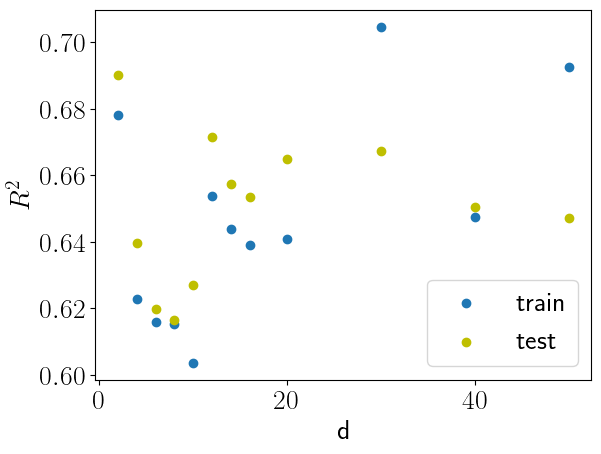

In [37]:
plt.scatter([2,4,6,8,10,12,14,16,20,30,40,50],r2_train,label="train")
plt.scatter([2,4,6,8,10,12,14,16,20,30,40,50],r2_test,c="y",label="test")
plt.ylabel(r"$R^2$")
plt.xlabel("d")
plt.legend()

In [ ]:
# k-fold
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,  shuffle=True, random_state=0)
y= no_polyp_order.to_numpy()
dims_test = [2,4,6,8,10,15,20,30,40,50,60]
r2_kfold_train = {d:[] for d in dims_test}
r2_kfold_test = {d:[] for d in dims_test}

for k, (train, test) in enumerate(kf.split(foreground_scaled,y)):
    for n_dims in dims_test:
        model = LinearCRBZ()
        model.fit(foreground_scaled[train], background_scaled, y[train],d=n_dims,print_every=100)
        preds = model.predict(foreground_scaled[train])
        _, _, r2_contrastivereg, _, _ = linregress(y[train].squeeze(), preds)
        r2_kfold_train[n_dims].append(r2_contrastivereg)
        preds = model.predict(foreground_scaled[test])
        _, _, r2_contrastivereg, _, _ = linregress(y[test].squeeze(), preds)
        r2_kfold_test[n_dims].append(r2_contrastivereg)
        

Step: 0               Log marginal lik.: -7664135168.0
Step: 100             Log marginal lik.: -1841075200.0
Step: 200             Log marginal lik.: -1079164672.0
Step: 300             Log marginal lik.: -784783616.0
Step: 400             Log marginal lik.: -623987520.0
Step: 500             Log marginal lik.: -521137952.0
Step: 600             Log marginal lik.: -449007232.0
Step: 700             Log marginal lik.: -395257120.0
Step: 800             Log marginal lik.: -353440992.0
Step: 900             Log marginal lik.: -319843744.0
Step: 1000            Log marginal lik.: -292167808.0
Step: 1100            Log marginal lik.: -268906784.0
Step: 1200            Log marginal lik.: -249036672.0
Step: 1300            Log marginal lik.: -231828256.0
Step: 1400            Log marginal lik.: -216753296.0
Step: 1500            Log marginal lik.: -203411312.0
Step: 1600            Log marginal lik.: -191501184.0
Step: 1700            Log marginal lik.: -180784928.0
Step: 1800            Log

Step: 15600           Log marginal lik.: -309620.0
Step: 15700           Log marginal lik.: -308595.25
Step: 15800           Log marginal lik.: -307624.75
Step: 15900           Log marginal lik.: -306705.69
Step: 16000           Log marginal lik.: -305835.53
Step: 16100           Log marginal lik.: -305012.06
Step: 16200           Log marginal lik.: -304232.75
Step: 16300           Log marginal lik.: -303495.25
Step: 16400           Log marginal lik.: -302797.94
Step: 16500           Log marginal lik.: -302138.25
Step: 16600           Log marginal lik.: -301514.84
Step: 16700           Log marginal lik.: -300925.56
Step: 16800           Log marginal lik.: -300368.94
Step: 16900           Log marginal lik.: -299843.19
Step: 17000           Log marginal lik.: -299346.62
Step: 17100           Log marginal lik.: -298877.84
Step: 17200           Log marginal lik.: -298435.88
Step: 17300           Log marginal lik.: -298018.75
Step: 17400           Log marginal lik.: -297625.62
Step: 17500  

Step: 10500           Log marginal lik.: -10427121.0
Step: 10600           Log marginal lik.: -10178095.0
Step: 10700           Log marginal lik.: -9933449.0
Step: 10800           Log marginal lik.: -9695036.0
Step: 10900           Log marginal lik.: -9463648.0
Step: 11000           Log marginal lik.: -9237209.0
Step: 11100           Log marginal lik.: -9016983.0
Step: 11200           Log marginal lik.: -8801750.0
Step: 11300           Log marginal lik.: -8591804.0
Step: 11400           Log marginal lik.: -8387196.5
Step: 11500           Log marginal lik.: -8187491.5
Step: 11600           Log marginal lik.: -7992125.0
Step: 11700           Log marginal lik.: -7801679.0
Step: 11800           Log marginal lik.: -7616381.5
Step: 11900           Log marginal lik.: -7434035.0
Step: 12000           Log marginal lik.: -7256769.0
Step: 12100           Log marginal lik.: -7082608.5
Step: 12200           Log marginal lik.: -6912430.5
Step: 12300           Log marginal lik.: -6745710.0
Step: 1240

Step: 5000            Log marginal lik.: -34307784.0
Step: 5100            Log marginal lik.: -33345908.0
Step: 5200            Log marginal lik.: -32416624.0
Step: 5300            Log marginal lik.: -31519636.0
Step: 5400            Log marginal lik.: -30654074.0
Step: 5500            Log marginal lik.: -29816000.0
Step: 5600            Log marginal lik.: -29004290.0
Step: 5700            Log marginal lik.: -28219792.0
Step: 5800            Log marginal lik.: -27458634.0
Step: 5900            Log marginal lik.: -26724060.0
Step: 6000            Log marginal lik.: -26010464.0
Step: 6100            Log marginal lik.: -25320068.0
Step: 6200            Log marginal lik.: -24650196.0
Step: 6300            Log marginal lik.: -24002912.0
Step: 6400            Log marginal lik.: -23371340.0
Step: 6500            Log marginal lik.: -22762822.0
Step: 6600            Log marginal lik.: -22169082.0
Step: 6700            Log marginal lik.: -21593712.0
Step: 6800            Log marginal lik.: -2103

Step: 20700           Log marginal lik.: -207349.11
Step: 20800           Log marginal lik.: -207254.23
Step: 20900           Log marginal lik.: -207169.77
Step: 21000           Log marginal lik.: -207095.89
Step: 21100           Log marginal lik.: -207029.28
Step: 21200           Log marginal lik.: -206970.81
Step: 21300           Log marginal lik.: -206919.16
Step: 21400           Log marginal lik.: -206875.38
Step: 0               Log marginal lik.: -7933242368.0
Step: 100             Log marginal lik.: -1073753344.0
Step: 200             Log marginal lik.: -628960448.0
Step: 300             Log marginal lik.: -458520608.0
Step: 400             Log marginal lik.: -365340032.0
Step: 500             Log marginal lik.: -305664448.0
Step: 600             Log marginal lik.: -263770432.0
Step: 700             Log marginal lik.: -232528816.0
Step: 800             Log marginal lik.: -208210992.0
Step: 900             Log marginal lik.: -188666592.0
Step: 1000            Log marginal lik.: -

Step: 14800           Log marginal lik.: -2853296.25
Step: 14900           Log marginal lik.: -2790460.5
Step: 15000           Log marginal lik.: -2729099.0
Step: 15100           Log marginal lik.: -2669336.75
Step: 15200           Log marginal lik.: -2610691.75
Step: 15300           Log marginal lik.: -2553833.0
Step: 15400           Log marginal lik.: -2498361.5
Step: 15500           Log marginal lik.: -2444266.0
Step: 15600           Log marginal lik.: -2391275.0
Step: 15700           Log marginal lik.: -2340053.25
Step: 15800           Log marginal lik.: -2289535.0
Step: 15900           Log marginal lik.: -2240510.75
Step: 16000           Log marginal lik.: -2192558.25
Step: 16100           Log marginal lik.: -2145972.75
Step: 16200           Log marginal lik.: -2100504.0
Step: 16300           Log marginal lik.: -2056060.75
Step: 16400           Log marginal lik.: -2012768.75
Step: 16500           Log marginal lik.: -1970622.25
Step: 16600           Log marginal lik.: -1929215.75
S

Step: 6000            Log marginal lik.: -20112250.0
Step: 6100            Log marginal lik.: -19578052.0
Step: 6200            Log marginal lik.: -19058900.0
Step: 6300            Log marginal lik.: -18555220.0
Step: 6400            Log marginal lik.: -18070556.0
Step: 6500            Log marginal lik.: -17596048.0
Step: 6600            Log marginal lik.: -17137106.0
Step: 6700            Log marginal lik.: -16691782.0
Step: 6800            Log marginal lik.: -16260975.0
Step: 6900            Log marginal lik.: -15841247.0
Step: 7000            Log marginal lik.: -15432695.0
Step: 7100            Log marginal lik.: -15039480.0
Step: 7200            Log marginal lik.: -14652941.0
Step: 7300            Log marginal lik.: -14278421.0
Step: 7400            Log marginal lik.: -13917303.0
Step: 7500            Log marginal lik.: -13564237.0
Step: 7600            Log marginal lik.: -13218507.0
Step: 7700            Log marginal lik.: -12885383.0
Step: 7800            Log marginal lik.: -1256

Step: 21700           Log marginal lik.: -609827.31
Step: 21800           Log marginal lik.: -600388.62
Step: 21900           Log marginal lik.: -590861.5
Step: 22000           Log marginal lik.: -581506.0
Step: 22100           Log marginal lik.: -572429.0
Step: 22200           Log marginal lik.: -563269.88
Step: 22300           Log marginal lik.: -554227.19
Step: 22400           Log marginal lik.: -544447.25
Step: 22500           Log marginal lik.: -532746.5
Step: 22600           Log marginal lik.: -500330.28
Step: 22700           Log marginal lik.: -221648.44
Step: 22800           Log marginal lik.: -174279.28
Step: 22900           Log marginal lik.: -166987.31
Step: 23000           Log marginal lik.: -164275.09
Step: 23100           Log marginal lik.: -162920.89
Step: 23200           Log marginal lik.: -162141.28
Step: 23300           Log marginal lik.: -161647.91
Step: 23400           Log marginal lik.: -161322.25
Step: 23500           Log marginal lik.: -161098.83
Step: 23600     

Step: 13200           Log marginal lik.: -2784897.0
Step: 13300           Log marginal lik.: -2720607.75
Step: 13400           Log marginal lik.: -2658155.25
Step: 13500           Log marginal lik.: -2597731.75
Step: 13600           Log marginal lik.: -2538103.25
Step: 13700           Log marginal lik.: -2480451.0
Step: 13800           Log marginal lik.: -2423947.0
Step: 13900           Log marginal lik.: -2369043.5
Step: 14000           Log marginal lik.: -2315596.5
Step: 14100           Log marginal lik.: -2262975.5
Step: 14200           Log marginal lik.: -2212164.5
Step: 14300           Log marginal lik.: -2162542.0
Step: 14400           Log marginal lik.: -2114274.0
Step: 14500           Log marginal lik.: -2066556.0
Step: 14600           Log marginal lik.: -2020611.75
Step: 14700           Log marginal lik.: -1975678.62
Step: 14800           Log marginal lik.: -1931991.75
Step: 14900           Log marginal lik.: -1889363.25
Step: 15000           Log marginal lik.: -1847294.75
Ste

Step: 800             Log marginal lik.: -140317344.0
Step: 900             Log marginal lik.: -127171832.0
Step: 1000            Log marginal lik.: -116331552.0
Step: 1100            Log marginal lik.: -107213904.0
Step: 1200            Log marginal lik.: -99420224.0
Step: 1300            Log marginal lik.: -92667904.0
Step: 1400            Log marginal lik.: -86750696.0
Step: 1500            Log marginal lik.: -81514456.0
Step: 1600            Log marginal lik.: -76841752.0
Step: 1700            Log marginal lik.: -72641448.0
Step: 1800            Log marginal lik.: -68841984.0
Step: 1900            Log marginal lik.: -65386308.0
Step: 2000            Log marginal lik.: -62228428.0
Step: 2100            Log marginal lik.: -59328176.0
Step: 2200            Log marginal lik.: -56654924.0
Step: 2300            Log marginal lik.: -54181472.0
Step: 2400            Log marginal lik.: -51885296.0
Step: 2500            Log marginal lik.: -49750560.0
Step: 2600            Log marginal lik.: -

Step: 16400           Log marginal lik.: -1290229.5
Step: 16500           Log marginal lik.: -1262144.25
Step: 16600           Log marginal lik.: -1234632.75
Step: 16700           Log marginal lik.: -1207752.0
Step: 16800           Log marginal lik.: -1181781.5
Step: 16900           Log marginal lik.: -1156344.0
Step: 17000           Log marginal lik.: -1131572.75
Step: 17100           Log marginal lik.: -1107374.0
Step: 17200           Log marginal lik.: -1083621.75
Step: 17300           Log marginal lik.: -1060620.75
Step: 17400           Log marginal lik.: -1038243.81
Step: 17500           Log marginal lik.: -1016245.69
Step: 17600           Log marginal lik.: -995239.12
Step: 17700           Log marginal lik.: -973909.0
Step: 17800           Log marginal lik.: -953423.56
Step: 17900           Log marginal lik.: -933590.31
Step: 18000           Log marginal lik.: -914185.25
Step: 18100           Log marginal lik.: -895136.25
Step: 18200           Log marginal lik.: -876706.62
Step: 

Step: 32200           Log marginal lik.: -130035.95
Step: 32300           Log marginal lik.: -129246.92
Step: 32400           Log marginal lik.: -128457.52
Step: 32500           Log marginal lik.: -127706.9
Step: 32600           Log marginal lik.: -126963.02
Step: 32700           Log marginal lik.: -126225.54
Step: 32800           Log marginal lik.: -125499.26
Step: 32900           Log marginal lik.: -124746.59
Step: 33000           Log marginal lik.: -122824.39
Step: 33100           Log marginal lik.: -86152.55
Step: 33200           Log marginal lik.: -84224.5
Step: 33300           Log marginal lik.: -84110.55
Step: 0               Log marginal lik.: -8372262400.0
Step: 100             Log marginal lik.: -582046144.0
Step: 200             Log marginal lik.: -346549568.0
Step: 300             Log marginal lik.: -253167280.0
Step: 400             Log marginal lik.: -201692304.0
Step: 500             Log marginal lik.: -168636208.0
Step: 600             Log marginal lik.: -145409680.0
St

Step: 14400           Log marginal lik.: -1588504.12
Step: 14500           Log marginal lik.: -1551781.0
Step: 14600           Log marginal lik.: -1515773.62
Step: 14700           Log marginal lik.: -1480546.0
Step: 14800           Log marginal lik.: -1446289.25
Step: 14900           Log marginal lik.: -1412989.62
Step: 15000           Log marginal lik.: -1380362.62
Step: 15100           Log marginal lik.: -1348369.62
Step: 15200           Log marginal lik.: -1317526.25
Step: 15300           Log marginal lik.: -1287458.5
Step: 15400           Log marginal lik.: -1258108.75
Step: 15500           Log marginal lik.: -1229122.5
Step: 15600           Log marginal lik.: -1200993.88
Step: 15700           Log marginal lik.: -1173569.25
Step: 15800           Log marginal lik.: -1146869.75
Step: 15900           Log marginal lik.: -1120620.75
Step: 16000           Log marginal lik.: -1095543.25
Step: 16100           Log marginal lik.: -1070674.62
Step: 16200           Log marginal lik.: -1046508.

Step: 30200           Log marginal lik.: -71807.0
Step: 30300           Log marginal lik.: -70784.0
Step: 30400           Log marginal lik.: -69782.09
Step: 30500           Log marginal lik.: -68760.68
Step: 30600           Log marginal lik.: -67811.92
Step: 30700           Log marginal lik.: -66843.27
Step: 30800           Log marginal lik.: -65899.19
Step: 30900           Log marginal lik.: -64994.22
Step: 31000           Log marginal lik.: -64057.43
Step: 31100           Log marginal lik.: -63197.81
Step: 31200           Log marginal lik.: -62307.72
Step: 31300           Log marginal lik.: -61466.47
Step: 31400           Log marginal lik.: -60646.2
Step: 31500           Log marginal lik.: -59820.48
Step: 31600           Log marginal lik.: -59017.44
Step: 31700           Log marginal lik.: -58218.66
Step: 31800           Log marginal lik.: -57459.57
Step: 31900           Log marginal lik.: -56717.3
Step: 32000           Log marginal lik.: -55958.75
Step: 32100           Log marginal 

Step: 9400            Log marginal lik.: -3677000.0
Step: 9500            Log marginal lik.: -3585370.75
Step: 9600            Log marginal lik.: -3496704.75
Step: 9700            Log marginal lik.: -3409924.5
Step: 9800            Log marginal lik.: -3326022.0
Step: 9900            Log marginal lik.: -3242917.0
Step: 10000           Log marginal lik.: -3163233.0
Step: 10100           Log marginal lik.: -3085237.0
Step: 10200           Log marginal lik.: -3008943.0
Step: 10300           Log marginal lik.: -2934155.5
Step: 10400           Log marginal lik.: -2861523.0
Step: 10500           Log marginal lik.: -2791003.0
Step: 10600           Log marginal lik.: -2722575.0
Step: 10700           Log marginal lik.: -2655930.5
Step: 10800           Log marginal lik.: -2590405.0
Step: 10900           Log marginal lik.: -2527635.5
Step: 11000           Log marginal lik.: -2465566.5
Step: 11100           Log marginal lik.: -2405891.5
Step: 11200           Log marginal lik.: -2346583.0
Step: 1130

Step: 25200           Log marginal lik.: -51438.15
Step: 25300           Log marginal lik.: -49355.73
Step: 25400           Log marginal lik.: -47318.4
Step: 25500           Log marginal lik.: -45338.69
Step: 25600           Log marginal lik.: -43389.9
Step: 25700           Log marginal lik.: -41543.38
Step: 25800           Log marginal lik.: -39713.11
Step: 25900           Log marginal lik.: -37872.69
Step: 26000           Log marginal lik.: -36089.36
Step: 26100           Log marginal lik.: -34342.92
Step: 26200           Log marginal lik.: -32670.59
Step: 26300           Log marginal lik.: -31002.47
Step: 26400           Log marginal lik.: -29341.11
Step: 26500           Log marginal lik.: -27752.32
Step: 26600           Log marginal lik.: -26166.82
Step: 26700           Log marginal lik.: -24644.0
Step: 26800           Log marginal lik.: -23111.76
Step: 26900           Log marginal lik.: -21657.69
Step: 27000           Log marginal lik.: -20232.49
Step: 27100           Log marginal

Step: 10700           Log marginal lik.: -2061125.75
Step: 10800           Log marginal lik.: -2008230.88
Step: 10900           Log marginal lik.: -1956598.62
Step: 11000           Log marginal lik.: -1906439.88
Step: 11100           Log marginal lik.: -1857570.38
Step: 11200           Log marginal lik.: -1809928.38
Step: 11300           Log marginal lik.: -1762669.25
Step: 11400           Log marginal lik.: -1717947.12
Step: 11500           Log marginal lik.: -1673355.75
Step: 11600           Log marginal lik.: -1630697.12
Step: 11700           Log marginal lik.: -1588674.5
Step: 11800           Log marginal lik.: -1548087.88
Step: 11900           Log marginal lik.: -1508450.38
Step: 12000           Log marginal lik.: -1469572.62
Step: 12100           Log marginal lik.: -1431346.25
Step: 12200           Log marginal lik.: -1394177.88
Step: 12300           Log marginal lik.: -1358805.25
Step: 12400           Log marginal lik.: -1323621.62
Step: 12500           Log marginal lik.: -12892

Step: 9600            Log marginal lik.: -2499796.25
Step: 9700            Log marginal lik.: -2431960.5
Step: 9800            Log marginal lik.: -2367399.75
Step: 9900            Log marginal lik.: -2304795.0
Step: 10000           Log marginal lik.: -2244966.5
Step: 10100           Log marginal lik.: -2182346.0
Step: 10200           Log marginal lik.: -2123991.5
Step: 10300           Log marginal lik.: -2069512.38
Step: 10400           Log marginal lik.: -2012930.12
Step: 10500           Log marginal lik.: -1960745.75
Step: 10600           Log marginal lik.: -1907186.5
Step: 10700           Log marginal lik.: -1855049.75
Step: 10800           Log marginal lik.: -1806292.88
Step: 10900           Log marginal lik.: -1756570.12
Step: 11000           Log marginal lik.: -1709923.88
Step: 11100           Log marginal lik.: -1665431.75
Step: 11200           Log marginal lik.: -1619194.25
Step: 11300           Log marginal lik.: -1574492.25
Step: 11400           Log marginal lik.: -1532676.5


Step: 25600           Log marginal lik.: 119016.81
Step: 25700           Log marginal lik.: 120439.56
Step: 25800           Log marginal lik.: 121831.22
Step: 25900           Log marginal lik.: 123215.0
Step: 26000           Log marginal lik.: 124493.53
Step: 26100           Log marginal lik.: 125793.53
Step: 26200           Log marginal lik.: 126949.64
Step: 26300           Log marginal lik.: 68812.49
Step: 26400           Log marginal lik.: 129835.03
Step: 26500           Log marginal lik.: 131030.69
Step: 26600           Log marginal lik.: 132197.81
Step: 26700           Log marginal lik.: 133340.84
Step: 26800           Log marginal lik.: 134460.38
Step: 26900           Log marginal lik.: 135557.28
Step: 27000           Log marginal lik.: 136589.41
Step: 27100           Log marginal lik.: 137624.94
Step: 27200           Log marginal lik.: 138658.66
Step: 27300           Log marginal lik.: 139639.95
Step: 27400           Log marginal lik.: 140589.88
Step: 27500           Log margina

Step: 10900           Log marginal lik.: -531756.38
Step: 11000           Log marginal lik.: -518937.25
Step: 11100           Log marginal lik.: -506821.56
Step: 11200           Log marginal lik.: -495368.0
Step: 11300           Log marginal lik.: -484534.81
Step: 11400           Log marginal lik.: -474290.5
Step: 11500           Log marginal lik.: -464595.19
Step: 11600           Log marginal lik.: -455423.25
Step: 11700           Log marginal lik.: -446740.62
Step: 11800           Log marginal lik.: -438520.31
Step: 11900           Log marginal lik.: -430737.56
Step: 12000           Log marginal lik.: -423367.25
Step: 12100           Log marginal lik.: -416385.94
Step: 12200           Log marginal lik.: -409772.19
Step: 12300           Log marginal lik.: -403505.91
Step: 12400           Log marginal lik.: -397567.72
Step: 12500           Log marginal lik.: -391940.0
Step: 12600           Log marginal lik.: -386605.78
Step: 12700           Log marginal lik.: -381549.12
Step: 12800    

Step: 5900            Log marginal lik.: -33457800.0
Step: 6000            Log marginal lik.: -32566164.0
Step: 6100            Log marginal lik.: -31701280.0
Step: 6200            Log marginal lik.: -30863576.0
Step: 6300            Log marginal lik.: -30051034.0
Step: 6400            Log marginal lik.: -29263518.0
Step: 6500            Log marginal lik.: -28499886.0
Step: 6600            Log marginal lik.: -27756302.0
Step: 6700            Log marginal lik.: -27037468.0
Step: 6800            Log marginal lik.: -26338916.0
Step: 6900            Log marginal lik.: -25660074.0
Step: 7000            Log marginal lik.: -25001332.0
Step: 7100            Log marginal lik.: -24360184.0
Step: 7200            Log marginal lik.: -23737146.0
Step: 7300            Log marginal lik.: -23132844.0
Step: 7400            Log marginal lik.: -22545076.0
Step: 7500            Log marginal lik.: -21974510.0
Step: 7600            Log marginal lik.: -21418880.0
Step: 7700            Log marginal lik.: -2087

Step: 500             Log marginal lik.: -323334016.0
Step: 600             Log marginal lik.: -278758336.0
Step: 700             Log marginal lik.: -245577280.0
Step: 800             Log marginal lik.: -219785248.0
Step: 900             Log marginal lik.: -199079392.0
Step: 1000            Log marginal lik.: -182037856.0
Step: 1100            Log marginal lik.: -167729344.0
Step: 1200            Log marginal lik.: -155517568.0
Step: 1300            Log marginal lik.: -144958464.0
Step: 1400            Log marginal lik.: -135719376.0
Step: 1500            Log marginal lik.: -127559784.0
Step: 1600            Log marginal lik.: -120284392.0
Step: 1700            Log marginal lik.: -113756576.0
Step: 1800            Log marginal lik.: -107857848.0
Step: 1900            Log marginal lik.: -102497904.0
Step: 2000            Log marginal lik.: -97599360.0
Step: 2100            Log marginal lik.: -93103264.0
Step: 2200            Log marginal lik.: -88959296.0
Step: 2300            Log margi

Step: 16100           Log marginal lik.: -2313887.25
Step: 16200           Log marginal lik.: -2265061.75
Step: 16300           Log marginal lik.: -2217426.25
Step: 16400           Log marginal lik.: -2170824.0
Step: 16500           Log marginal lik.: -2125246.5
Step: 16600           Log marginal lik.: -2080662.0
Step: 16700           Log marginal lik.: -2037082.5
Step: 16800           Log marginal lik.: -1994022.25
Step: 16900           Log marginal lik.: -1951811.38
Step: 17000           Log marginal lik.: -1910131.75
Step: 17100           Log marginal lik.: -1868898.25
Step: 17200           Log marginal lik.: -1827488.25
Step: 17300           Log marginal lik.: -1785146.0
Step: 17400           Log marginal lik.: -1740287.5
Step: 17500           Log marginal lik.: -1688485.25
Step: 17600           Log marginal lik.: -1614966.0
Step: 17700           Log marginal lik.: -1436563.0
Step: 17800           Log marginal lik.: -762115.38
Step: 17900           Log marginal lik.: -372216.88
Ste

Step: 10300           Log marginal lik.: -8195662.5
Step: 10400           Log marginal lik.: -7999039.5
Step: 10500           Log marginal lik.: -7805691.5
Step: 10600           Log marginal lik.: -7619148.0
Step: 10700           Log marginal lik.: -7435309.5
Step: 10800           Log marginal lik.: -7257069.0
Step: 10900           Log marginal lik.: -7084190.5
Step: 11000           Log marginal lik.: -6914707.0
Step: 11100           Log marginal lik.: -6750009.5
Step: 11200           Log marginal lik.: -6588960.5
Step: 11300           Log marginal lik.: -6432229.5
Step: 11400           Log marginal lik.: -6279799.5
Step: 11500           Log marginal lik.: -6131560.5
Step: 11600           Log marginal lik.: -5986421.5
Step: 11700           Log marginal lik.: -5844773.0
Step: 11800           Log marginal lik.: -5707327.5
Step: 11900           Log marginal lik.: -5572980.0
Step: 12000           Log marginal lik.: -5441678.0
Step: 12100           Log marginal lik.: -5314245.5
Step: 12200 

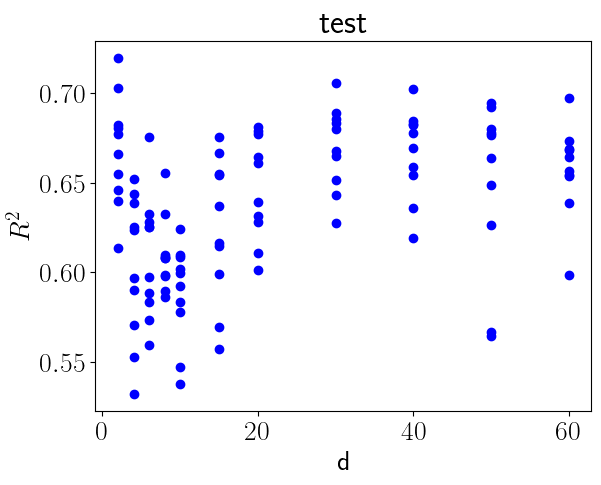

In [45]:
for d in dims_test:
    plt.scatter([d for i in range(10)], r2_kfold_test[d],c="b")
    
plt.ylabel(r"$R^2$")
plt.xlabel("d")
plt.title("test")
plt.savefig("10fold_cv_r2_test.pdf")

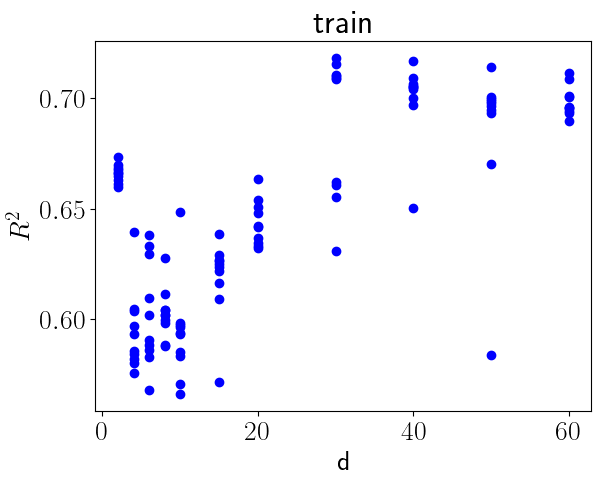

In [46]:
for d in dims_test:
    plt.scatter([d for i in range(10)], r2_kfold_train[d],c="b")
plt.ylabel(r"$R^2$")
plt.xlabel("d")
plt.title("train")
plt.savefig("10fold_cv_r2_train.pdf")

In [48]:
pd.DataFrame(r2_kfold_train).to_csv("10fold_cv_r2_train.csv")

In [49]:
pd.DataFrame(r2_kfold_test).to_csv("10fold_cv_r2_test.csv")

In [27]:
r2_test

[0.6901173264395912,
 0.6395623668246608,
 0.6199495252681335,
 0.6164883921307549,
 0.6270545736682238,
 0.6715031382899129,
 0.6573526199983136,
 0.6535106142553855]

In [23]:
latent_t = pd.DataFrame(model.t, columns = dims, dtype="float")

In [8]:
model_scaled.fit(foreground_train, background_scaled, no_polyp_order_train,d=7,print_every=100)

2023-03-19 08:37:19.526508: E external/org_tensorflow/tensorflow/compiler/xla/service/slow_operation_alarm.cc:65] Constant folding an instruction is taking > 1s:

  dot.14 (displaying the full instruction incurs a runtime overhead. Raise your logging level to 4 or above).

This isn't necessarily a bug; constant-folding is inherently a trade-off between compilation time and speed at runtime.  XLA has some guards that attempt to keep constant folding from taking too long, but fundamentally you'll always be able to come up with an input program that takes a long time.

If you'd like to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
2023-03-19 08:37:20.029040: E external/org_tensorflow/tensorflow/compiler/xla/service/slow_operation_alarm.cc:133] The operation took 1.502617962s
Constant folding an instruction is taking > 1s:

  dot.14 (displaying the full instruction incurs a runtime overhead. Raise your logging level to 4 or above).

This isn't necessa

Step: 0               Log marginal lik.: -4592058368.0
Step: 100             Log marginal lik.: -741701504.0
Step: 200             Log marginal lik.: -431154560.0
Step: 300             Log marginal lik.: -313952384.0
Step: 400             Log marginal lik.: -250108080.0
Step: 500             Log marginal lik.: -209264352.0
Step: 600             Log marginal lik.: -180596832.0
Step: 700             Log marginal lik.: -159218464.0
Step: 800             Log marginal lik.: -142577744.0
Step: 900             Log marginal lik.: -129208792.0
Step: 1000            Log marginal lik.: -118199392.0
Step: 1100            Log marginal lik.: -108955856.0
Step: 1200            Log marginal lik.: -101069072.0
Step: 1300            Log marginal lik.: -94241808.0
Step: 1400            Log marginal lik.: -88267576.0
Step: 1500            Log marginal lik.: -82986304.0
Step: 1600            Log marginal lik.: -78281392.0
Step: 1700            Log marginal lik.: -74053360.0
Step: 1800            Log margin

Step: 15600           Log marginal lik.: -1719273.75
Step: 15700           Log marginal lik.: -1683360.75
Step: 15800           Log marginal lik.: -1648253.0
Step: 15900           Log marginal lik.: -1614141.5
Step: 16000           Log marginal lik.: -1580555.5
Step: 16100           Log marginal lik.: -1548013.0
Step: 16200           Log marginal lik.: -1516049.75
Step: 16300           Log marginal lik.: -1484984.88
Step: 16400           Log marginal lik.: -1454586.75
Step: 16500           Log marginal lik.: -1424870.5
Step: 16600           Log marginal lik.: -1395661.88
Step: 16700           Log marginal lik.: -1367242.25
Step: 16800           Log marginal lik.: -1339167.75
Step: 16900           Log marginal lik.: -1311650.38
Step: 17000           Log marginal lik.: -1284345.75
Step: 17100           Log marginal lik.: -1257328.38
Step: 17200           Log marginal lik.: -1230177.75
Step: 17300           Log marginal lik.: -1202099.0
Step: 17400           Log marginal lik.: -1171992.0


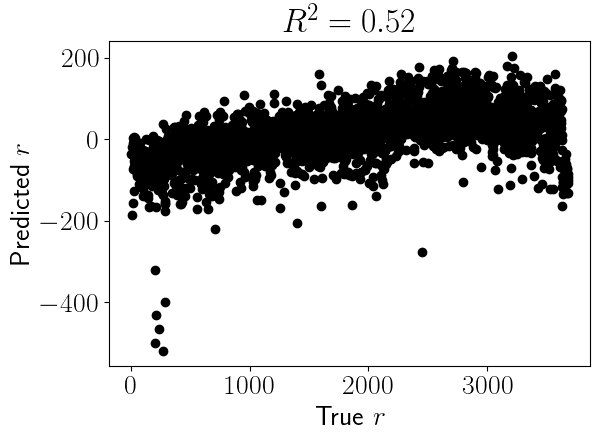

In [15]:

preds = model_scaled.predict(foreground_train)
_, _, r2_contrastivereg, _, _ = linregress(no_polyp_order_train.squeeze(), preds)
plt.scatter(no_polyp_order_train,preds,c="black")
plt.xlabel(r"True $r$")
plt.ylabel(r"Predicted $r$")
plt.title(r"$R^2 = " + str(round(r2_contrastivereg, 2)) + "$")
plt.tight_layout()
plt.show()

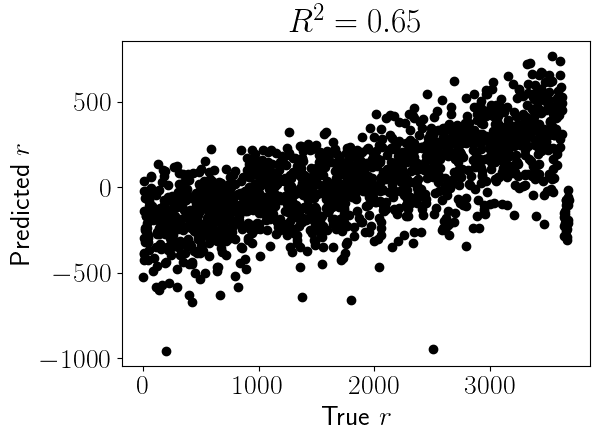

In [29]:
preds = model.predict(foreground_test)
_, _, r2_contrastivereg, _, _ = linregress(no_polyp_order_test.squeeze(), preds)
plt.scatter(no_polyp_order_test,preds,c="black")
plt.xlabel(r"True $r$")
plt.ylabel(r"Predicted $r$")
plt.title(r"$R^2 = " + str(round(r2_contrastivereg, 2)) + "$")
plt.tight_layout()
plt.show()